## Sentiment Analysis

In this exercise we use the IMDb-dataset, which we will use to perform a sentiment analysis. The code below assumes that the data is placed in the same folder as this notebook. We see that the reviews are loaded as a pandas dataframe, and print the beginning of the first few reviews.

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

reviews = pd.read_csv('reviews.txt', header=None)
labels = pd.read_csv('labels.txt', header=None) 
labels = (labels=='positive').astype(np.int_)

In [204]:
#Pre-processing - join both dataframes
if len(reviews) != len(labels): 
    raise ValueError('Reviews and labels dont have the same number of rows')

merged_df = pd.concat([reviews.reset_index(drop=True), labels.reset_index(drop=True)], axis=1)
merged_df.columns = ['review', 'label']
print(merged_df)

                                                  review  label
0      bromwell high is a cartoon comedy . it ran at ...      1
1      story of a man who has unnatural feelings for ...      0
2      homelessness  or houselessness as george carli...      1
3      airport    starts as a brand new luxury    pla...      0
4      brilliant over  acting by lesley ann warren . ...      1
...                                                  ...    ...
24995  i saw  descent  last night at the stockholm fi...      0
24996  a christmas together actually came before my t...      1
24997  some films that you pick up for a pound turn o...      0
24998  working  class romantic drama from director ma...      1
24999  this is one of the dumbest films  i  ve ever s...      0

[25000 rows x 2 columns]


**(a)** Split the reviews and labels in test, train and validation sets. The train and validation sets will be used to train your model and tune hyperparameters, the test set will be saved for testing. Use the `CountVectorizer` from `sklearn.feature_extraction.text` to create a Bag-of-Words representation of the reviews. Only use the 10,000 most frequent words (use the `max_features`-parameter of `CountVectorizer`).

In [205]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer(max_features=10000)
X = vectorizer.fit_transform(merged_df['review']).toarray()
y = np.array(merged_df['label'])
print(vectorizer.get_feature_names_out()[:10])

X_, X_test, y_, y_test = train_test_split(X, y, train_size=.70, random_state=504)
X_train, X_validate, y_train, y_validate = train_test_split(X_, y_, train_size=.75, random_state=504)

['aaron' 'abandon' 'abandoned' 'abc' 'abilities' 'ability' 'able' 'aboard'
 'abominable' 'abomination']


**(b)** Explore the representation of the reviews. How is a single word represented? How about a whole review?

In [206]:
feature_names = vectorizer.get_feature_names_out()

word = "abomination" 
word_index = list(feature_names).index(word) if word in feature_names else None

if word_index is not None:
    print(f"Word '{word}' is in column {word_index}.")
    print(f"Counts for '{word}' in all reviews: {X[:, word_index]}")
else:
    print(f"Word '{word}' is not in the vocabulary.")


review_index = 0 
review_vector = X[review_index]

non_zero_indices = review_vector.nonzero()[0]

non_zero_words = [(feature_names[i], review_vector[i]) for i in non_zero_indices]

print(f"Review at index {review_index}:")
print("Words and their counts:", non_zero_words)

Word 'abomination' is in column 9.
Counts for 'abomination' in all reviews: [0 0 0 ... 0 0 0]
Review at index 0:
Words and their counts: [('about', 1), ('adults', 1), ('age', 1), ('all', 1), ('and', 1), ('as', 2), ('at', 2), ('believe', 1), ('burn', 1), ('can', 1), ('cartoon', 1), ('classic', 1), ('closer', 1), ('comedy', 1), ('down', 1), ('episode', 1), ('expect', 1), ('far', 1), ('fetched', 1), ('here', 1), ('high', 5), ('immediately', 1), ('in', 2), ('insightful', 1), ('inspector', 1), ('is', 4), ('isn', 1), ('it', 2), ('knew', 1), ('lead', 1), ('life', 1), ('line', 1), ('many', 1), ('me', 2), ('much', 1), ('my', 2), ('of', 4), ('one', 1), ('other', 1), ('pathetic', 1), ('pity', 1), ('profession', 1), ('programs', 1), ('ran', 1), ('reality', 1), ('remind', 1), ('repeatedly', 1), ('right', 1), ('sack', 1), ('same', 1), ('satire', 1), ('saw', 1), ('school', 2), ('schools', 1), ('see', 1), ('situation', 1), ('some', 1), ('student', 2), ('students', 2), ('such', 1), ('survive', 1), ('te

**(c)** Train a neural network with a single hidden layer on the dataset, tuning the relevant hyperparameters to optimize accuracy. 

In [207]:
import tensorflow as tf
from tensorflow.keras import layers

ann = tf.keras.Sequential([
    layers.Dense(4, input_dim=10000, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

ann.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

es = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
history = ann.fit(X_train, y_train, epochs = 100, validation_data=(X_validate, y_validate), callbacks=[es])



c:\Users\Bruger\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7795 - loss: 0.4866 - val_accuracy: 0.8766 - val_loss: 0.2979
Epoch 2/100
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9394 - loss: 0.1820 - val_accuracy: 0.8720 - val_loss: 0.3135
Epoch 3/100
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9589 - loss: 0.1242 - val_accuracy: 0.8665 - val_loss: 0.3874
Epoch 4/100
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9785 - loss: 0.0748 - val_accuracy: 0.8697 - val_loss: 0.4066
Epoch 5/100
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9846 - loss: 0.0581 - val_accuracy: 0.8738 - val_loss: 0.4353
Epoch 6/100
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9870 - loss: 0.0470 - val_accuracy: 0.8672 - val_loss: 0.4490
Epoch 7/100
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9900 - loss: 0.0374 - val_accuracy: 0.8690 - val_loss: 0.4726
Epoch 8/100
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9914 - loss: 0.0302 - val_accu

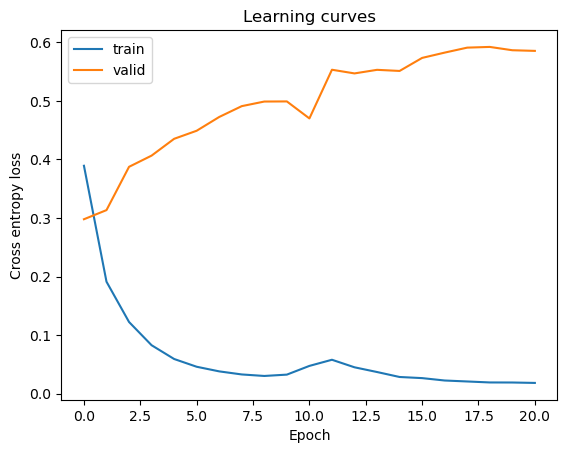

In [208]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.legend()
plt.show()

**(d)** Test your sentiment-classifier on the test set.

In [219]:
from sklearn.metrics import accuracy_score

test_loss, test_accuracy = ann.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

y_pred_proba = ann.predict(X_test)

y_pred = (y_pred_proba >= 0.5).astype(int)

y_pred = y_pred.flatten()

print(f"First 10 Predictions: {y_pred[:10]}")
print(f"First 10 True Labels: {y_test[:10]}")

accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Prediction Accuracy (using accuracy_score): {accuracy:.2f}%")

total_tests = len(y_test)
print(f"Total Tests: {total_tests}")

correct_predictions = np.sum(y_pred == y_test)
print(f"Correct Predictions: {correct_predictions}")

incorrect_predictions = np.sum(y_pred != y_test)
print(f"Incorrect Predictions: {incorrect_predictions}")


235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8807 - loss: 0.3024
Test Loss: 0.3017
Test Accuracy: 0.8788
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
First 10 Predictions: [1 0 0 0 1 0 0 0 0 0]
First 10 True Labels: [1 0 0 0 1 0 0 0 0 0]
Prediction Accuracy (using accuracy_score): 87.88%
Total Tests: 7500
Correct Predictions: 6591
Incorrect Predictions: 909


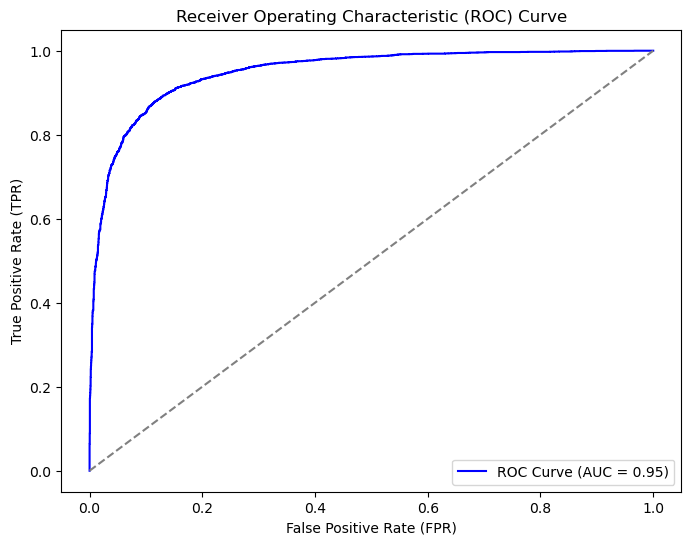

In [210]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

**(e)** Use the classifier to classify a few sentences you write yourselves. 

In [248]:
#review_text = "The movie was absolutely fantastic! I loved every moment of it."
#review_text = "I was thrilled by the plot twist, but the ending was underwhelming."
#review_text = "Not bad, but not great either."
#review_text = "It's just okay. Nothing special about it."
#review_text = "The staff were friendly, but the wait time was unacceptably long."
#review_text = "Worst customer service I have ever experienced."
review_text = "The new update is incredible. It exceeded all my expectations."

review_vectorized = vectorizer.transform([review_text]).toarray()
review_prediction_proba = ann.predict(review_vectorized)
review_prediction = (review_prediction_proba >= 0.5).astype(int)

if review_prediction == 1:
    print("The review is predicted to be positive!\n")
else:
    print("The review is predicted to be negative!\n")

review_prediction_proba[0][0] = review_prediction_proba[0][0] * 100
print(f"Predicted probability of being positive: {review_prediction_proba[0][0]:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The review is predicted to be positive!

Predicted probability of being positive: 79.56%
